<a href="https://colab.research.google.com/github/IsmaelSaid/IsmaelSaid/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gradient descent**

## **Exemple 1**

---


### $f(x) = x^2 + x + 1 $ 
### $f'(x) = 2x + 1 $ 

our loop run  24
local minimum occurs at: -0.5000014215144014
slope : df(x) -2.8430288028236106e-06
 f(x) 0.7500000000020207


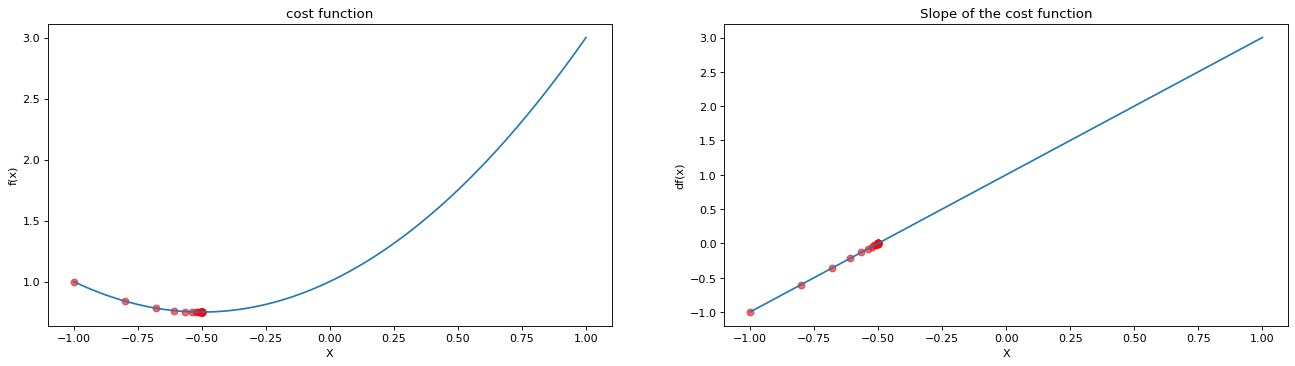

In [ ]:
import sympy as smp 
import numpy as np 


import matplotlib.pyplot as plt 
# line equation : 
def f(x):
  return x**2 + x + 1 
x = smp.symbols('x')
df = smp.lambdify(x,smp.diff(f(x),x))


new_x = -1
previous_x = 0 
step_multiplier = 0.2 
precision = 0.000001 

x_list = [new_x]
slop_list = [df(new_x)]

for n in range(100):
  previous_x = new_x 
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient
  step_size = abs(new_x-previous_x)
  x_list.append(new_x)
  slop_list.append(df(new_x))
  if step_size < precision : 
    print("our loop run ",n)
    break


print('local minimum occurs at:',new_x)
print('slope : df(x)',df(new_x))
print(' f(x)',f(new_x))


# Visualisation 
num_x = np.linspace(-1,1,1000)

plt.figure(figsize=(20, 5), dpi=80)

plt.subplot(1,2,1)
plt.title('cost function')
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(num_x,f(num_x))
plt.scatter (x_list,f(np.array(x_list)),color = 'red',alpha = 0.6)


plt.subplot(1,2,2)
plt.title('Slope of the cost function')
plt.xlabel("X")
plt.ylabel("df(x)")
plt.plot(num_x,df(num_x))
plt.scatter (x_list,slop_list,color = 'red',alpha = 0.6)
plt.show()

## **Exemple 2**

---


### $g(x) = x^4 - 4x^2+5$
### $g'(x) = 4x^3 - 8x$

In [ ]:
def g(x):
  return x**4 - 4*x**2 + 5 

def dg(x):
  return 4*x**3 - 8 * x 

In [ ]:
def gradient_descent(derivative_func, initial_guess, learning_rate, precision):
  new_x = initial_guess
  x_list = [new_x]
  slop_list = [derivative_func(new_x)]

  for n in range(500):
    previous_x = new_x 
    gradient = derivative_func(previous_x)
    new_x = previous_x - learning_rate * gradient


    step_size = abs(new_x-previous_x)
    x_list.append(new_x)
    slop_list.append(derivative_func(new_x))
    if step_size < precision :
      break

  return new_x, x_list, slop_list

local_min, list_x, deriv_list = gradient_descent(dg,1, 0.01,0.00001) 
print("local min occurs at ",local_min)
print("Numbers of steps ",len(list_x))
print(deriv_list)


local min occurs at  1.4141687750839818
Numbers of steps  57
[-4, -3.820544, -3.611871903550238, -3.379886330653556, -3.1312232225960956, -2.8727857395850585, -2.611284581018147, -2.3528403221652843, -2.10268759714448, -1.864999736491928, -1.6428315371048257, -1.4381617460756804, -1.2520078051668673, -1.0845833141304055, -0.9354718212694593, -0.8037966338820084, -0.6883732621601055, -0.5878374028207194, -0.5007462756855361, -0.42565445797030677, -0.361167281912115, -0.3059756964048752, -0.2588765923486491, -0.2187822556024841, -0.18472206606235808, -0.15583895665617398, -0.13138257075571858, -0.11070055513897081, -0.09322901382878612, -0.07848282462849099, -0.06604627513823758, -0.055564295340664316, -0.046734436111352196, -0.0392996551591871, -0.0330419137720277, -0.02777655118546818, -0.02334738209910192, -0.019622452087160625, -0.016490381898535134, -0.013857232403703179, -0.011643825453621304, -0.009783460948412426, -0.008219976151707442, -0.00690609919524654, -0.005802054463579509

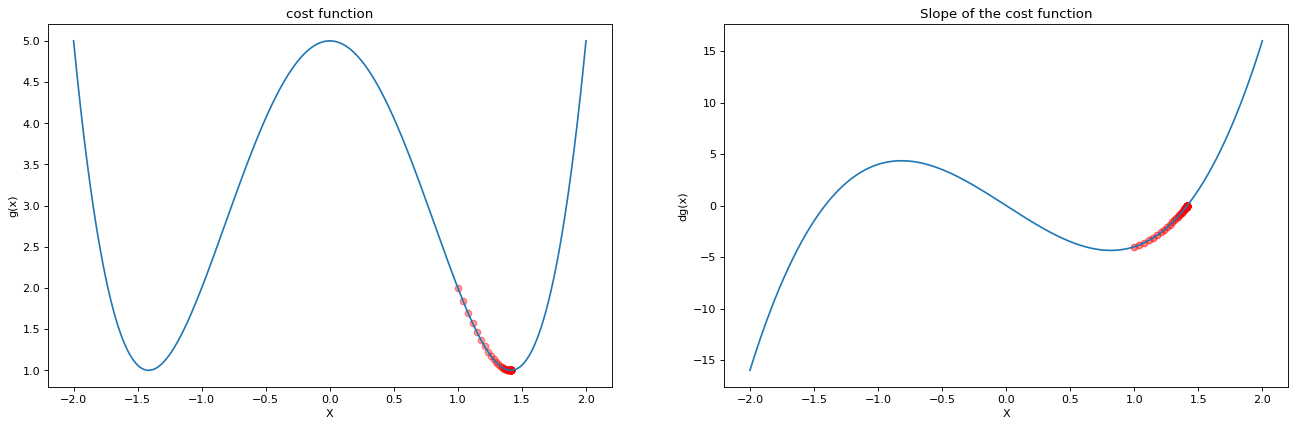

In [ ]:
# Visualisation 
num_x = np.linspace(-2,2,1000)

plt.figure(figsize=(20, 6), dpi=80)

plt.subplot(1,2,1)
plt.title('cost function')
plt.xlabel("X")
plt.ylabel("g(x)")
plt.scatter (list_x,g(np.array(list_x)),color = 'red',alpha = 0.4)

plt.plot(num_x,g(num_x))


plt.subplot(1,2,2)

plt.title('Slope of the cost function')
plt.scatter(list_x,deriv_list,color='red',alpha=0.5)
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.plot(num_x,dg(num_x))
plt.show()


# **Linear Regression** 

$h_θ(x) = θ_{0}x + θ_{1} $  
$J(θ) = \frac{1}{n} × \sum_{i=1}^{n} (y^i - h_{θ}(x^i))^2 $  
$J(θ_{0},θ_{1}) = \frac{1}{n} × \sum_{i=1}^{n} (y^i -(\theta_{0}x^i + \theta_{1}) )^2 $  


---

Chaine rules:  
$f(x) = h(g(x))$  
$\frac{df}{dx} = \frac{dh}{dg} \cdot \frac{dg}{dx}$


---
1. $(y^i -(\theta_{0}x^i + \theta_{1}) )^2 = A(B(\theta_{0},\theta_{1}))$
2. $\frac{df}{d\theta_{0}} = \frac{1}{n}\sum_{i=1}^{n} -2x^i(y^i - (\theta_{0}x^i + \theta_{1}))  \\
\frac{df}{d\theta_{1}} =\frac{1}{n}\sum_{i=1}^{n} -2(y^i - (\theta_{0}x^i + \theta_{1})) $
  





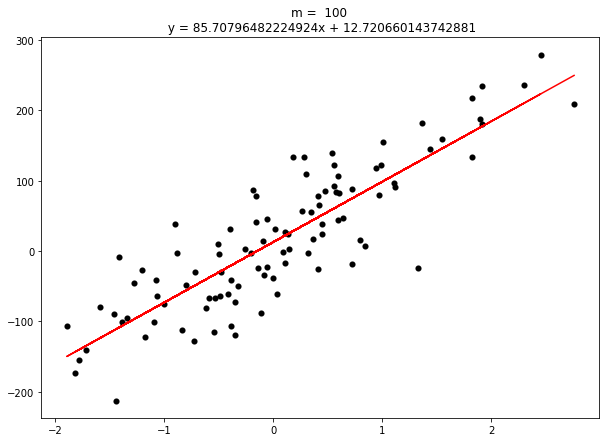

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x,y = make_regression(n_samples = 100, n_features = 1, noise = 50)


theta0 = 1
theta1 = 1
def gradient(x,y,theta0,theta1):
  t1 = theta0 
  t2 = theta1 
  for i in range(len(x)):
    t1 += -2*x[i]*(y[i] - (theta0 * x[i] +theta1)) 
    t2 += -2*(y[i] - (theta0 * x[i] +theta1))
  return (t1[0],t2[0]) 

a,b = gradient(x,y,0.5,0.5)

def descente_gradient(x,y,theta0,theta1,n_iterations,learning_rate):
  preva = theta0
  prevb = theta1
  for i in range(1,n_iterations):
    grada,gradb = gradient(x,y,preva,prevb)
    preva = preva - learning_rate * grada
    prevb = prevb - learning_rate * gradb
  return preva,prevb


a,b = descente_gradient(x,y,theta0,theta1,250,0.001)
def h(x,theta0,theta1):
  return theta0 * x + theta1 


m = len(y)
plt.figure(figsize=(10,7))
plt.scatter(x,y,linewidths=0.1, c = 'black')
plt.plot(x,h(x,a,b),c='red')
plt.title("m =  {} \n y = {}x + {}".format(m,a,b))
plt.show()


$h_θ(x) = θ_{0}x + θ_{1} $  
$J(θ) = \frac{1}{2n} × \sum_{i=1}^{n} (y^i - h_{θ}(x^i))^2 $  
$J(θ_{0},θ_{1}) = \frac{1}{2n} × \sum_{i=1}^{n} (y^i -(\theta_{0}x^i + \theta_{1}) )^2 $  


---


1. $\frac{df}{d\theta_{0}} = -\frac{1}{n}\sum_{i=1}^{n} x^i(y^i - (\theta_{0}x^i + \theta_{1}))  \\
\frac{df}{d\theta_{1}} =- \frac{1}{n}\sum_{i=1}^{n}(y^i - (\theta_{0}x^i + \theta_{1})) $



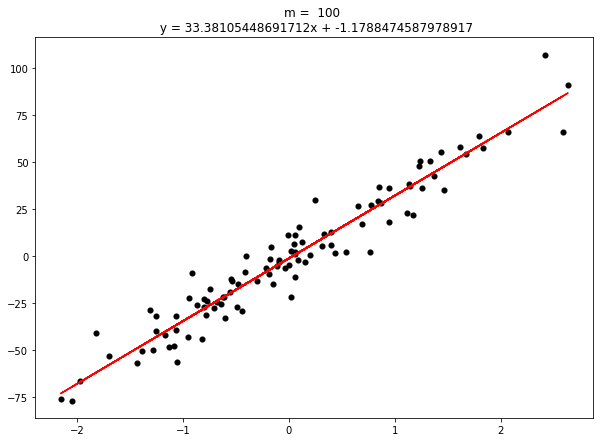

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)


theta0 = 1
theta1 = 1
def gradient(x,y,theta0,theta1):
  t1 = theta0 
  t2 = theta1 
  for i in range(len(x)):
    t1 += x[i]*(y[i] - (theta0 * x[i] +theta1)) 
    t2 += (y[i] - (theta0 * x[i] +theta1))
  return (-1/len(y)*t1[0],-1/len(y)*t2[0]) 

a,b = gradient(x,y,3,1)

def descente_gradient(x,y,theta0,theta1,n_iterations,learning_rate):
  preva = theta0
  prevb = theta1
  for i in range(1,n_iterations):
    grada,gradb = gradient(x,y,preva,prevb)
    preva = preva - learning_rate * grada
    prevb = prevb - learning_rate * gradb
  return preva,prevb


a,b = descente_gradient(x,y,theta0,theta1,500,0.01)
def h(x,theta0,theta1):
  return theta0 * x + theta1 


m = len(y)
plt.figure(figsize=(10,7))
plt.scatter(x,y,linewidths=0.1, c = 'black')
plt.plot(x,h(x,a,b),c='red')
plt.title("m =  {} \n y = {}x + {}".format(m,a,b))
plt.show()


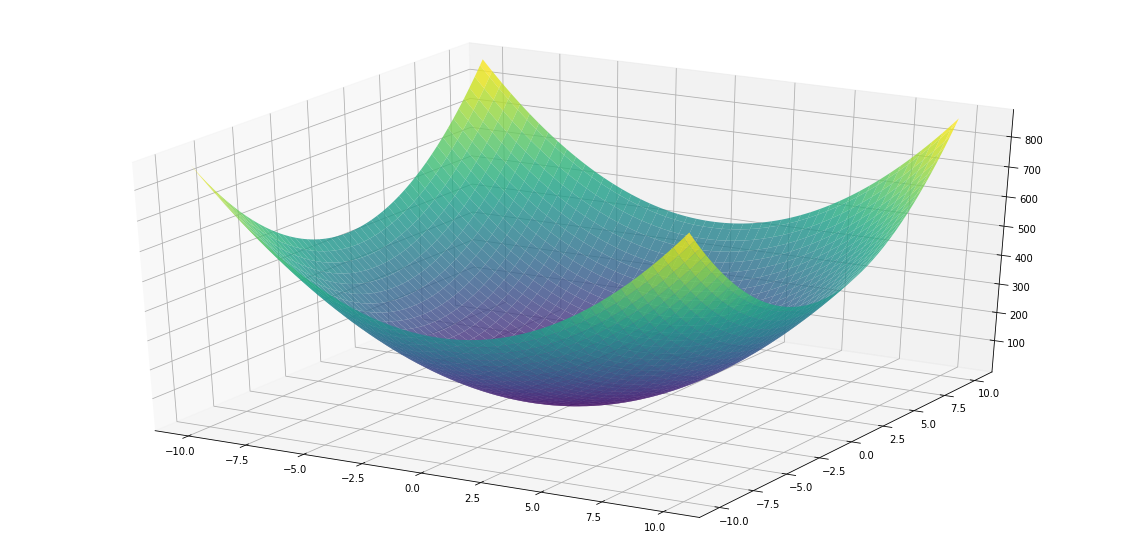

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cost_function(theta0,theta1,x,y):
  error = 0 
  for i in range(1,len(x)):
    error += (y[i] - (theta0 * x[i] + theta1)**2)
  return error * (-1/n)

t0 = np.linspace(-10,10,100)
t1 = np.linspace(-10,10,100)
theta0,theta1 = np.meshgrid(t0,t1)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')

ax.plot_surface(theta0,theta1,cost_function(theta0,theta1,x,y),alpha=0.8,cmap = 'viridis')
plt.show()